In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv('dataset.csv')

X = data.values

def normalize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

X_normalized = normalize(X)

In [15]:
def k_means(X, k, max_iters=100):
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for i in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return labels, centroids

k2_labels, k2_centroids = k_means(X_normalized, 2)
k3_labels, k3_centroids = k_means(X_normalized, 3)

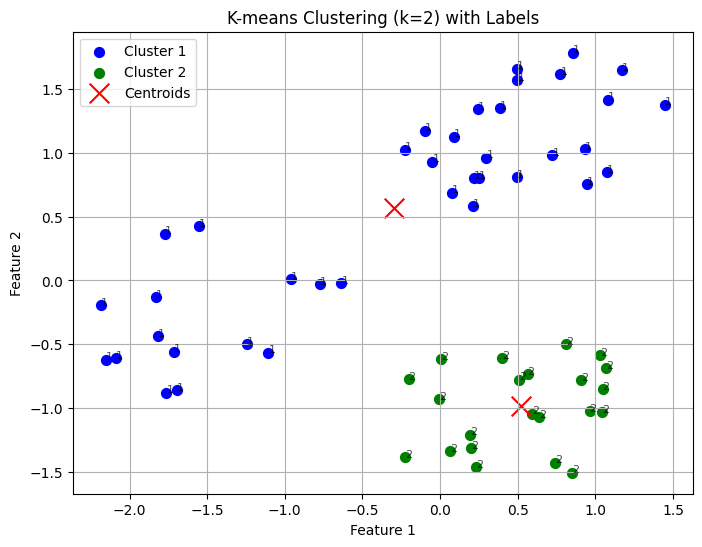

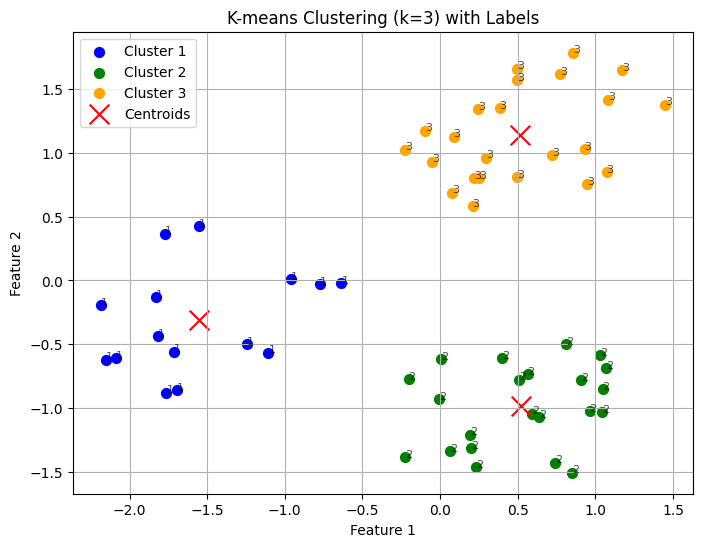

In [16]:
# %%
def plot_clusters(X, labels, centroids, k):
    plt.figure(figsize=(8, 6))
    
    colors = ['blue', 'green', 'orange', 'purple', 'brown', 'cyan', 'magenta']
    for cluster in range(k):
        cluster_points = X[labels == cluster]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                    c=colors[cluster % len(colors)], label=f'Cluster {cluster+1}', s=50)
        
        # Annotate points
        for point in cluster_points:
            plt.text(point[0], point[1], f'{cluster+1}', fontsize=8, alpha=0.7)
    
    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=200, label='Centroids')
    
    plt.title(f'K-means Clustering (k={k}) with Labels')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_clusters(X_normalized, k2_labels, k2_centroids, k=2)
plot_clusters(X_normalized, k3_labels, k3_centroids, k=3)

